In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

In [12]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US['job_posted_month'] = df_DA_US['job_posted_date'].dt.month
df_DA_US_exploded = df_DA_US.explode('job_skills')

In [13]:
df_DA_US_pivot = df_DA_US_exploded.pivot_table(index='job_posted_month', columns='job_skills', aggfunc='size', fill_value=0)
df_DA_US_pivot.loc['Total'] = df_DA_US_pivot.sum()
df_DA_US_pivot = df_DA_US_pivot[df_DA_US_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_US_pivot = df_DA_US_pivot.drop('Total')

In [14]:
DA_totals = df_DA_US.groupby(by='job_posted_month').size()
df_perc = df_DA_US_pivot.div(DA_totals/100, axis=0)

In [15]:
df_perc = df_perc.reset_index()
df_perc['month'] = df_perc['job_posted_month'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_perc = df_perc.set_index('month')
df_perc = df_perc.drop('job_posted_month', axis=1)

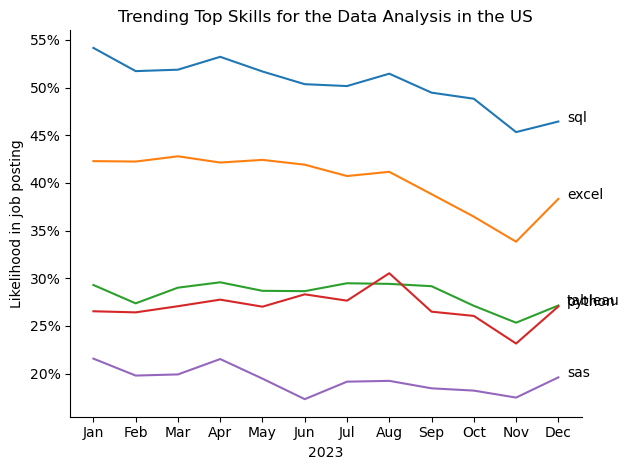

In [16]:
df_perc_plot = df_perc.iloc[:,:5]
sns.lineplot(data=df_perc_plot, dashes=False, palette='tab10')
plt.title("Trending Top Skills for the Data Analysis in the US")
plt.ylabel("Likelihood in job posting")
plt.xlabel('2023')
plt.legend().remove()
sns.despine()
from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))
for i in range(5):
    plt.text(11.2, df_perc_plot.iloc[-1, i], df_perc_plot.columns[i])

plt.tight_layout()
plt.show()